In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
#load Employee_Salry data from excel file into DataFrame
data=pd.read_excel("C:/Users/Admin/Downloads/Employee_Salary.xlsx")

In [4]:
df=pd.DataFrame(data)

In [5]:
df

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448
...,...,...
1995,19.178575,421534.69100
1996,19.254499,430478.02650
1997,19.353369,438090.84540
1998,19.842520,482242.16080


In [6]:
X=df[['Years of Experience']]
Y=df['Salary']

In [7]:
df.corr()

,Years of Experience,Salary
Years of Experience,1.000000,0.772432
Salary,0.772432,1.000000


The correlation coefficient ranges from -1 to 1. A value close to 1 suggests a strong positive linear relationship, meaning that as one variable  increases, the other variable  also tends to increase. In this case, a correlation coefficient of 0.772 indicates a relatively strong positive correlation.

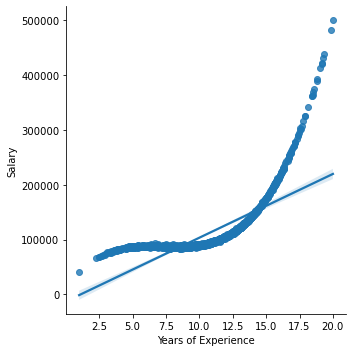

In [8]:
sns.lmplot(x='Years of Experience',y='Salary',data=df)

# Creating Training Dataset

In [9]:
X=df[['Years of Experience']]
Y=df['Salary']

# Solution1:Linear regression model training

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [11]:
regression=LinearRegression(fit_intercept=True)

In [12]:
regression.fit(X_train,Y_train)

LinearRegression()

In [13]:
print('Linear Model coeff(m): ',regression.coef_)
print("Linear model coeff (b): ",regression.intercept_)

Linear Model coeff(m):  [11404.45041268]
Linear model coeff (b):  -10535.704304947212


Text(0.5, 1.0, 'Salary vs Years of Experience(Training Dataset)')

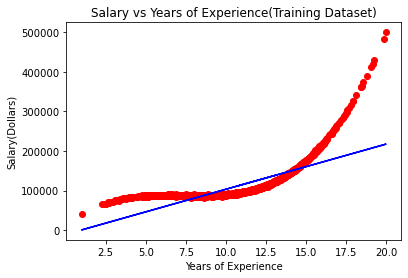

In [19]:
#visualise the result 
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regression.predict(X_train),color='blue')
plt.ylabel("Salary(Dollars)")
plt.xlabel("Years of Experience")
plt.title("Salary vs Years of Experience(Training Dataset)")

This linear regression model is underfitting the data, meaning it has high bias and is unable to capture the underlying patterns or relationship between the variables adequately, 

# Solution 2: polynomial model training
we are importing PolynomialFeatures It helping us to Achieve  a curve because of Higher degree of X.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly_regressor=PolynomialFeatures(degree=2)
#import a class to insentiate an object from that class 

In [17]:
#Transform the matrix of feature X into multiarray of feature X_Columns
#which contains the original features and associated polynomial
X_columns=poly_regressor.fit_transform(X_train)

In [18]:
print(X_columns)

[[  1.          10.79998036 116.63957578]
 [  1.          12.34977504 152.51694354]
 [  1.          10.60903317 112.5515848 ]
 ...
 [  1.           8.83217399  78.00729746]
 [  1.          14.43577488 208.39159639]
 [  1.          13.11203798 171.92553999]]


In [21]:
regressor=LinearRegression()
regressor.fit(X_columns,Y_train)

LinearRegression()

In [22]:
print("Model Coeffiecient :",regressor.coef_)

Model Coeffiecient : [     0.         -32138.15437765   2054.65059016]


# Visualize the Polynomial Result

In [27]:
X_train.shape

(1600, 1)

In [28]:
Y_predict =regressor.predict(poly_regressor.fit_transform(X_train))

In [29]:
Y_predict.shape

(1600,)

Text(0.5, 1.0, 'Salary vs Years of Experience(Polynomial training Dataset)')

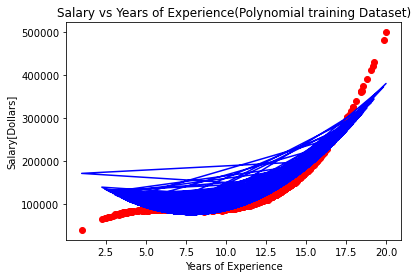

In [31]:
plt.scatter(X_train,Y_train,color="red")
plt.plot(X_train,Y_predict,color='blue')
plt.ylabel("Salary[Dollars]")
plt.xlabel("Years of Experience")
plt.title("Salary vs Years of Experience(Polynomial training Dataset)")

This Polynomial regression  which allows for a more flexible relationship between the (X) and the  (Y) by introducing higher-order polynomial terms. By increasing the degree of the polynomial, you introduce more curvature to the model, potentially capturing more complex patterns in the data.